Exploration of Zero Values.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.formula.api import ols
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
pd.set_option('display.max_columns', None)
pd.set_option("display.max_colwidth", 0)
#add auto reload for src function testing
%load_ext autoreload
%autoreload 2
%matplotlib inline

#let's add the project directory to our module path
import os
import sys

module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)
    
    
#also import all of our modules
import pandas as pd
import numpy as np
from src import data_cleaning
from src import cm_functions

#and here is our data directiory
data_folder = '../../data/'

# Initial import of 2019 Sales Data containing Zero Values.

In [3]:
sales_2019=pd.read_csv('../../data/EXTR_RPSale_2019.csv',dtype={'ExciseTaxNbr': 'string','Major': 'string','Minor': 'string','PIN':'string'})

**Now we need to filter our data on what we perceive to be actual sales.** 
**Exlusions:** Assumptions,Mortgage Assumption, Foreclosure,Trust,Executor-to admin guardian,Testamentary Trust,Estate,Settlement,Settlement, Property Settlement,Divorce Settlement
, Tenancy Partition, Community Prop Established, Partial Int - love,aff,gft,Easement, Correction (refiling),Trade,Quit Claim Deed - gift/full or part interest

In [5]:
zero_sales=sales_2019[sales_2019["SalePrice"]==0]

,Unnamed: 0,ExciseTaxNbr,Major,Minor,DocumentDate,SalePrice,RecordingNbr,Volume,Page,PlatNbr,PlatType,PlatLot,PlatBlock,SellerName,BuyerName,PropertyType,PrincipalUse,SaleInstrument,AFForestLand,AFCurrentUseLand,AFNonProfitUse,AFHistoricProperty,SaleReason,PropertyClass,SaleWarning,PIN
3,482,3015516,779790,0030,2019-10-07,0,20191016000009,,,,,,,HEUTMAKER JOSEPH E+LINDA A,STONE AVENUE HOUSE LLC,11,6,3,N,N,N,N,1,8,,7797900030
6,1021335,2980649,797320,2320,2019-03-28,0,,,,,,,,CARDONA ROMINA GUZMAN,MARTINEZ JAVIER JIMENEZ,3,6,15,N,N,N,N,10,8,18 31 51,7973202320
7,600,3013394,663990,0178,2019-10-02,0,20191002000875,,,,,,,HAN CHAO+GAO YUE,GAO YUE,3,6,15,N,N,N,N,19,8,18 31 51 52,6639900178
11,716,3028464,640331,0010,2019-12-31,0,20200102000331,,,,,,,WARNER NANCY L,WARNER NANCY L+WARNER CREDIT SHELTER TRUST TODD GR,11,6,15,N,N,N,N,1,8,,6403310010
12,363667,3007081,640331,0010,2019-08-20,0,20190827000878,,,,,,,WARNER NICHOLAS,WARNER NICHOLAS,11,6,15,N,N,N,N,1,8,,6403310010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42653,2086580,3014179,810860,0240,2019-09-30,0,20191007001830,,,,,,,SEGALE MARK A+KERI D,SEGALE MARK A+KERI D-FLT+TTEES,3,6,15,N,N,N,N,5,8,12 18 31,8108600240
42665,2087132,3010345,636290,0116,2019-09-13,0,20190916000748,,,,,,,SHEPARD DAVID J,SHEPARD DAVID J+SHEPARD LIVING TRUST,11,6,15,N,N,N,N,1,8,18,6362900116
42666,2087143,3007943,242303,9158,2019-07-20,0,20190830001205,,,,,,,MCKITTRICK LANYA L,MCKITTRICK TODD M+LANYA L,3,6,15,N,N,N,N,13,8,18 31 51,2423039158
42667,2087558,3011447,004200,0010,2019-09-23,0,20190923001098,,,,,,,SWAFFORD VICKIE+RICHARD,KOCH-JOHNSON ALICIA,11,6,15,N,N,N,N,1,8,,0042000010


Calculate our total Zero values

In [35]:
zero_sales["SaleInstrument"].value_counts()

15    10410
3     1882 
26    343  
24    267  
2     232  
27    100  
4     93   
22    42   
18    35   
21    9    
19    8    
20    2    
23    1    
1     1    
Name: SaleInstrument, dtype: int64

In [ ]:
Filter our zero Values by Sales instrument aka how our sales was done.

In [22]:
zero_sales["SaleWarning"].value_counts()

                  7441
18 31 51          2618
18 31 51 52       487 
12 31 51          367 
18                310 
                 ...  
18 22 31 51 52    1   
11 18 22 31       1   
16 26 31          1   
16 18 31 45       1   
18 56             1   
Name: SaleWarning, Length: 162, dtype: int64

In [33]:
s_i=zero_sales["SaleInstrument"].value_counts()

In [57]:
sale_insturment=pd.DataFrame(zero_sales["SaleInstrument"].value_counts())
sale_insturment

,SaleInstrument
15,10410
3,1882
26,343
24,267
2,232
27,100
4,93
22,42
18,35
21,9


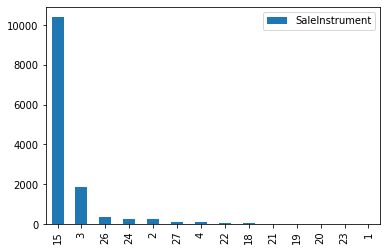

In [50]:
sale_insturment.plot.bar()

# Import our look up Library

In [51]:
df_lu=pd.read_csv('../../data/EXTR_LookUp.csv')

In [52]:
def LU_item(df,number):
    """Put in name of your Look up data frame then description number and it will use this Data frame. 
    To give the values associated with it and its descriptions from least to greatest"""
    lu_list=df[df["LUType"]== number]
    return lu_list.sort_values("LUItem", ascending=True)

In [61]:
SaleInstrument=LU_item(df_lu,6)
SaleInstrument

,LUType,LUItem,LUDescription
1002,6,1,None
1009,6,2,Warranty Deed
1019,6,3,Statutory Warranty Deed
1020,6,4,Special Warranty Deed
1021,6,5,Corporate Warranty Deed
1022,6,6,Assumption Warranty Deed
1023,6,7,Grant Deed
1024,6,8,Contract (equity)
1025,6,9,Contract (installment)
1003,6,10,Real Estate Contract


In [54]:
sale_insturment_df=pd.DataFrame(SaleInstrument)
sale_insturment_df

,LUType,LUItem,LUDescription
1002,6,1,None
1009,6,2,Warranty Deed
1019,6,3,Statutory Warranty Deed
1020,6,4,Special Warranty Deed
1021,6,5,Corporate Warranty Deed
1022,6,6,Assumption Warranty Deed
1023,6,7,Grant Deed
1024,6,8,Contract (equity)
1025,6,9,Contract (installment)
1003,6,10,Real Estate Contract


In [67]:
sale_insturment_df.loc["LUItem"],sale_insturment_df["LUDescription"]

KeyError: 'LUItem'

In [56]:
graph_data=sale_insturment.merge(sale_insturment_df, how="inner", on="LUItem")
graph_data

KeyError: 'LUItem'

It is made clear that